# Decision Tree

Analyze data white_wine.csv
- Apply Decision Tree Classification Method (max_depth = 2)
    - Target: Quality (quality > 6 > Y = 1(good), if y = 2(bad))
    - Features: Density & Alcohol
- Validate the model using accuracy in 20% testing data
- Apply scaling and Validate the model using accuracy in 20% testing data
- Check the perfomance: is there any difference whether we applied scaling or not?
- Check the tree: is there any difference whether we applied scaling or not?


## Data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
wine = pd.read_csv(r'C:\Users\dheof\Desktop\Help\Purwadhika\Csv_Files\white_wine.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


In [3]:
wine['quality'].describe()

count    519.000000
mean       5.805395
std        0.880226
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: quality, dtype: float64

In [4]:
wine['label'] = np.where(wine['quality'] > 6, 1, 0)
wine[['quality', 'label']]

,quality,label
0,6.0,0
1,6.0,0
2,6.0,0
3,6.0,0
4,6.0,0
...,...,...
515,6.0,0
516,5.0,0
517,6.0,0
518,6.0,0


In [5]:
wine[['quality', 'label']][wine['label'] == 1]

,quality,label
13,7.0,1
15,7.0,1
17,8.0,1
20,8.0,1
21,7.0,1
...,...,...
476,7.0,1
491,7.0,1
507,7.0,1
509,7.0,1


## EDA

<AxesSubplot:xlabel='density', ylabel='alcohol'>

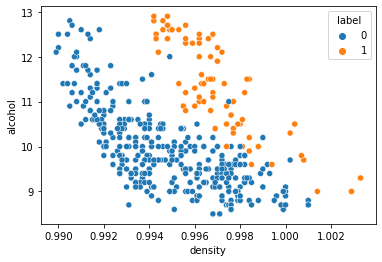

In [7]:
sns.scatterplot(x = 'density', y = 'alcohol', hue = 'label', data = wine)

In [8]:
wine[['alcohol', 'density']].isnull().sum() ## MENGECEK APAKAH ADA MISSING VALUE (NA) ATAU TIDAK

alcohol    1
density    0
dtype: int64

In [9]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace = True) ## MENGISI NA DENGAN NILAI RATA2 ALCOHOL

In [10]:
wine[['alcohol', 'density']].isnull().sum() ## NA SUDAH TERISI DENGAN NILAI RATA2 ALCOHOL

alcohol    0
density    0
dtype: int64

## Data Splitting

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = wine[['alcohol', 'density']]
y = wine['label']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 2020
)

## Scaling

### Scaler.fit hanya pada train agar hasil pengukuran performa model valid

In [14]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Tree withtout Scaling

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [17]:
tree = DecisionTreeClassifier(
    max_depth = 2,
    criterion = 'entropy'
)

In [18]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [19]:
y_pred_class = tree.predict(x_test)

In [24]:
print('Akurasinya adalah', accuracy_score(y_test, y_pred_class) * 100,'%')

Akurasinya adalah 92.3076923076923 %


In [25]:
from sklearn.tree import plot_tree

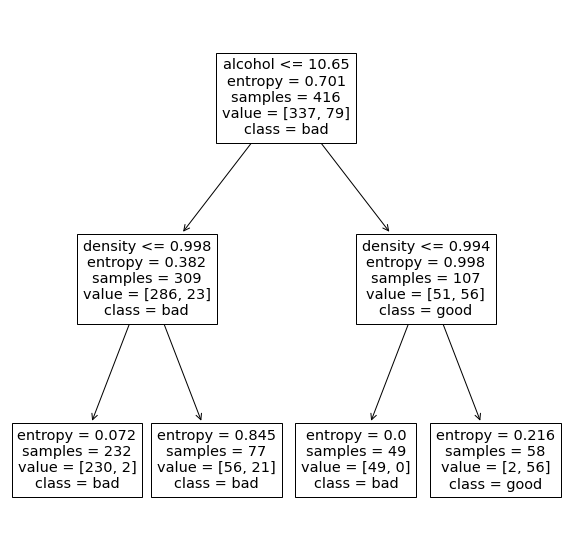

In [31]:
plt.figure( figsize = (10,10))
plot_tree(tree, feature_names = list(x), class_names = ['bad','good'])
plt.show()

1. Alcohol <= 10.65 ---> density <= 0.998 ---> bad
2. Alcohol <= 10.65 ---> density >= 0.998 ---> bad
3. Alcohol >= 10.65 ---> density <= 0.994 ---> bad
4. Alcohol >= 10.65 ---> density >= 0.994 ---> good

- Alcohol = 11, Density = 1 ---> GOOD (Rule 4)
- Alcohol = 10, Density = 0.9 ---> BAD (Rule 1)

## Tree With Scaling

In [32]:
tree_scaled = DecisionTreeClassifier(
    max_depth = 2,
    criterion = 'entropy'
)

In [35]:
tree_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [36]:
y_pred_test_sclaed = tree_scaled.predict(x_test_scaled)

In [37]:
print('Akurasinya adalah', accuracy_score(y_test, y_pred_test_sclaed) * 100,'%')

Akurasinya adalah 92.3076923076923 %


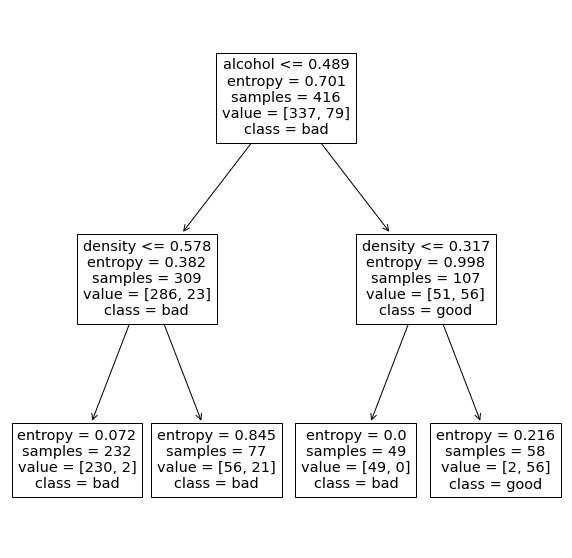

In [38]:
plt.figure( figsize = (10,10))
plot_tree(tree_scaled, feature_names = list(x), class_names = ['bad','good'])
plt.show()